# Fit model parameters with Minuit library

In [1]:
import sys
sys.path.append("../lib/")

import numpy as np

from DalitzPhaseSpace import DalitzPhaseSpace
from PhspGen import PhspGen
from DalitzModel import DalitzModel
from Efficiency import Detector

Unbinned maximum likelihood fit procedure is going to be used. The logarithmic likelihood function is

$-log(L) = -\ln{\sum_{i=1}^N |M(\xi_i)|^2} + 2\ln{\sum_{j=1}^{N^{\prime}} |M(\xi_j)|^2}$

In [2]:
def loglh(model, data, normSample):
    """ Calcultes normalized log lh function given mode, data sample and normalization sample """
    return -np.sum(np.log(model.density(data))) + np.log(np.sum(model.density(normSample))) * len(data)

Here is our simple model for $D^0\to K_S^0\pi^+\pi^-$

In [3]:
model = DalitzModel(0.495, 0.139, 0.139, 1.865)
model.add_bw('rho(770)', .770, .1490, 1, 'BC')
model.add_bw('K*', .89166, 0.0508, 1, 'AB', 0.638*np.exp(1j*np.radians(133.2)))

In [4]:
detector = Detector(15, 0.05, 1.)

In [5]:
from DPGen import DPGen

In [6]:
dpgen = DPGen(model)
phspgen = PhspGen(model)

In [7]:
model.mass_sq_range['AB']

[0.40195600000000004, 2.979076]

In [8]:
data = dpgen(2000, 'AB', 'BC', True)[:2000]
data = data[detector.effMask(data)]

normSample = phspgen(10**5, 'AB', 'BC', True)
normSample = normSample[detector.effMask(normSample)]

0 2000
96 events generated
96 2000
282 events generated
282 2000
546 events generated
546 2000
885 events generated
885 2000
1313 events generated
1313 2000
1825 events generated
1825 2000
2427 events generated
Efficiency: 0.173357142857


In [9]:
for name, val in zip(data.dtype.names, data[0]):
    print('{}: {}'.format(name, val))

AB: 0.405871966625
BC: 0.610511089235
AC: 2.74550894414
alpha: 5.85003641144
beta: -0.846042772352
eA: 0.834514453288
eB: 0.201618513635
eC: 0.828867033076
pA: [-0.45654087  0.21112174  0.44540703]
pB: [-0.08666579  0.04771989  0.10742848]
pC: [ 0.54320666 -0.25884163 -0.55283551]


In [10]:
import matplotlib.pyplot as plt
from PlotUtility import show_phase_space, plot_ddist, projections, scatter_dalitz

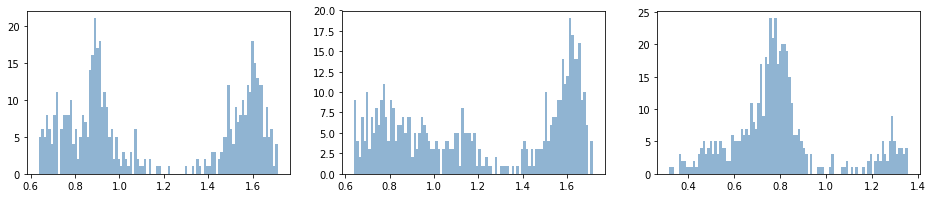

In [11]:
projections(data)
plt.show()

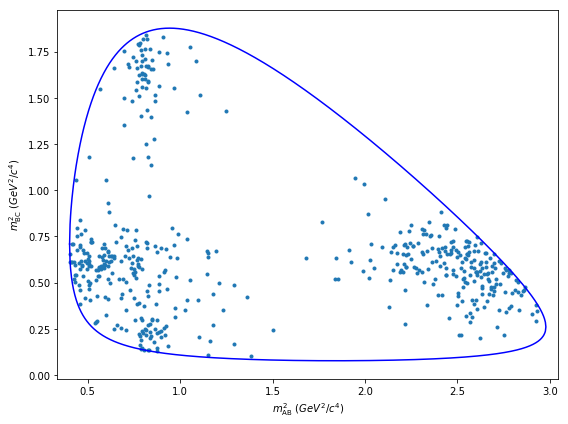

In [12]:
fig = scatter_dalitz(data, 'AB', 'BC', 2)
fig = show_phase_space(model, 'AB', 'BC', 2)
plt.show()

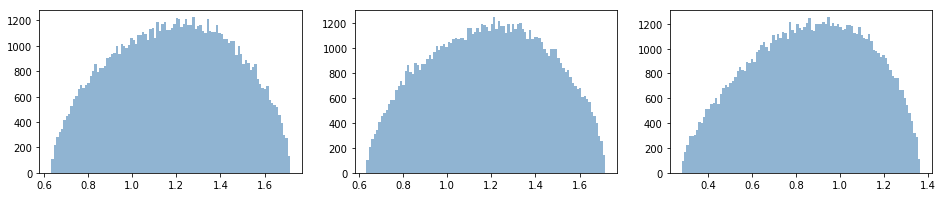

In [13]:
projections(normSample)
plt.show()

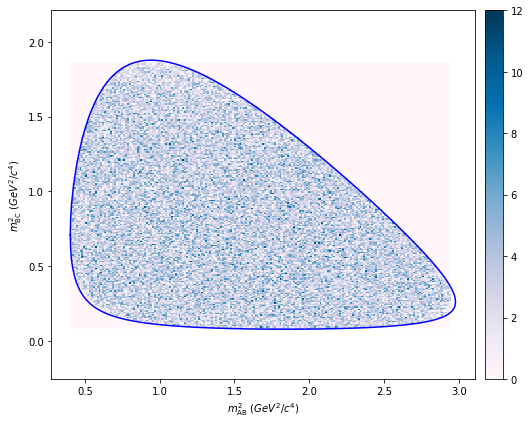

In [14]:
fig = plot_ddist(normSample, 'AB', 'BC', 200, 3)
fig = show_phase_space(model, 'AB', 'BC', 3)
plt.show()

In [15]:
from iminuit import Minuit

In [16]:
def fcn(a, phi):
    """ """
    model.set_ampl('K*', a)
    model.set_phase('K*', phi)
    llh = loglh(model, data, normSample)
    print('llh: {} a: {} phi: {}'.format(llh, a, phi))
    return llh

In [17]:
minimizer = Minuit(fcn,
                   a=0.638, phi=np.radians(133.2),
                   error_a=0.1, error_phi=0.1,
                   limit_a=(0, None), limit_phi=(-np.pi, np.pi),
                   fix_phi=False,
                   errordef=0.5)

In [18]:
minimizer.print_param()

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,a,0.638,0.1,,,0,,No
1,phi,2.32478,0.1,,,-3.14159,3.14159,No


In [19]:
fmin, param = minimizer.migrad()

llh: 5252.14547239 a: 0.638 phi: 2.32477856366
llh: 5252.11756994 a: 0.643018141933 phi: 2.32477856366
llh: 5252.19725783 a: 0.632990975927 phi: 2.32477856366
llh: 5252.13383213 a: 0.639624078095 phi: 2.32477856366
llh: 5252.15961731 a: 0.636376878106 phi: 2.32477856366
llh: 5252.14904267 a: 0.638 phi: 2.32978537926
llh: 5252.14520635 a: 0.638 phi: 2.31975866173
llh: 5252.10987369 a: 0.646370003552 phi: 2.32186603033
llh: 5252.10975489 a: 0.646859124595 phi: 2.32169596284
llh: 5252.11128419 a: 0.648488356622 phi: 2.32169596284
llh: 5252.11069107 a: 0.645230833415 phi: 2.32169596284
llh: 5252.11360761 a: 0.646859124595 phi: 2.32606281548
llh: 5252.10842839 a: 0.646859124595 phi: 2.31731920384
llh: 5252.10841975 a: 0.647006127987 phi: 2.3170384292
llh: 5252.10967087 a: 0.648648337115 phi: 2.3170384292
llh: 5252.10967391 a: 0.645364874393 phi: 2.3170384292
llh: 5252.10961752 a: 0.647006127987 phi: 2.32139710407
llh: 5252.10974057 a: 0.647006127987 phi: 2.3126699523
llh: 5252.10841975 a: 0

FCN = 5252.10841975 
 TOTAL NCALL = 30 
 NCALLS = 30 
 
 
 EDM = 7.28621060451e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,a,0.647006,0.0334393,,,0,,No
1,phi,2.31704,0.0886282,,,-3.14159,3.14159,No


In [20]:
param

[{'error': 0.03343926984196777,
  'has_limits': True,
  'has_lower_limit': True,
  'has_upper_limit': False,
  'is_const': False,
  'is_fixed': False,
  'lower_limit': 0.0,
  'name': 'a',
  'number': 0,
  'upper_limit': None,
  'value': 0.6470061279868062},
 {'error': 0.08862821823867018,
  'has_limits': True,
  'has_lower_limit': True,
  'has_upper_limit': True,
  'is_const': False,
  'is_fixed': False,
  'lower_limit': -3.141592653589793,
  'name': 'phi',
  'number': 1,
  'upper_limit': 3.141592653589793,
  'value': 2.3170384292007125}]

Plot the fitted model

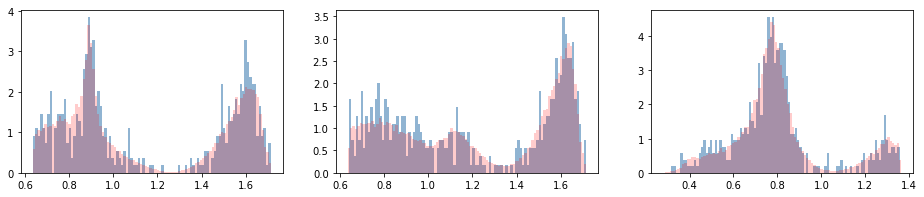

In [21]:
model.set_ampl('K*', param[0]['value'])
model.set_phase('K*', param[1]['value'])
weights = model.density(normSample)
figax = projections(data, 'steelblue', True, 0.6)
projections(normSample, 'red', True, 0.2, weights, figax)
plt.show()